<center><h1> Reinforcement Learning with Keras and OpenAI</h1></center>

<center><font color="grey"><i><h5> Jannis Busch & Sabrina Steinert</h5></i></font></center>

<img src="img/breakout.gif" alt="Breakout" style="width: 200px;"/>

The following tutorial tries to teach the basics of reinforcement learning, a special area of machine learning in which machines are trained to take certain actions based on respective rewards which they ought to maximize.

## Reinforcement Learning's Position in the World

<img src="img/RLworld1.png" alt="RL universe" style="width: 650px;"/>
<!-- ![title](img/RLworld1.png) -->

Reinforcement Learning is one paradigm of machine learning, often positioned next to supervised and unsupervised learning. The three categories are different in their input data and the way their algorithms handle the data. 

The **unsupervised learning** paradigm receives data as input without any prior knowledge regarding labels or in other words what the data could possibly tell and as an output provides a pure statistical view of structures in the data. 

**Supervised learning** algorithms receive training data that presents already labeled datasets which the algorithm can work with to improve its estimations of "real" unlabeled data. 

The last paradigm, **reinforcement learning**, does not involve a big chunk of input data. The input data is rather generated on the fly while the algorithm interacts with a previously defined environment. The environment involves a system of rewards which builds the foundation of the algorithm's learning process. 

![title](img/mlalgorithms.png) 
source: https://adgefficiency.com/energy_py-reinforcement-learning-for-energy-systems/

![title](img/mlalgorithms_detail.png)
source: https://www.researchgate.net/figure/Basic-structures-of-the-three-learning-paradigms-supervised-learning-reinforcement_fig1_260652455

# Simply speaking...

Reinforcement learning was majorly inspired by behaviourist psychology. To understand this context a bit better let's take a quick look at what "behaviors" actually are, e.g. human behaviors. 

### Behaviorism

Behaviors are based on the assumption that "all behavior, no matter how complex, can be reduced to a simple **stimulus-response association**."¹ This implies that human beings (and animals as well) are shaped entirely by their external environment. 

¹source: https://www.simplypsychology.org/behaviorism.html

An example of this stimulus-response association is a mouse expecting a reward (e.g. food) after a certain behavior (e.g. pushing a lever). In such a case, the stimulus has been induced to an extend that the mouse is proactively pursuing the behavior. This is called **operant conditioning** as opposed to classical conditioning, in which the stimulus is triggered by a neutral signal before a reflex. 

![title](img/classicaloperandcond.jpg)
source: https://psychologenie.com/difference-between-operant-classical-conditioning

### From a brain's perspective

While behaviorism is a research area of psychology, there have also been major findings in neurology, describing the reward systems from a brain pathway perspective. The so called **mesolimbic pathway** was found to be responsible for our understanding of rewards and the memory thereof. 

The mesolimbic pathway is a dopaminergic one, meaning that it consists of neurons that synthesize and release the neurotransmitter **dopamine**. Dopamine is the brain's way of storing information on both rewards and punishments. So in order for us to remember a very pleasant or very unpleasant experience, we need dopamine, and dopamine is produced in the **ventral tegmental area**. 

![title](img/reward-pathway.jpg)
source: http://discovermagazine.com/2015/may/17-resetting-the-addictive-brain

### Connecting the dots

In order to move from psychology and neurology to reinforcement learning, let's capture the basic assumptions which are carried from the two scientific  disciplines into the reinforcement learning algorithm:

- **Behaviorism**: Human beings are shaped by their external environment
- **Operant Conditioning**: Actions are followed by a reward or punishment
- **Mesolimbic Pathway**: Reward and punishment are regulated by an interpreter (VTA)

The idea is to build an algorithm that implements all of the bullet points above. It should behave according to the external environment, the algorithm's actions should be followed by a reward or punishment which is regulated by some interpreter (e.g VTA). 

# Mathematically speaking...

In order to understand reinforcement learning also in a mathematical sense, we'll make use of a simple example of an environment. Let's start by building our components conceptually. To keep it simple, we'll use some aliases that make it easy to understand the abstraction:

### Open AI Gym: Dagobert and the 5 boxes

- Dagobert alias Agent
- Box 0-4 alias Environment
- Move alias Action
- Coin alias Reward

The game works as follows:
We start by placing Dagobert in box 0. No coins given. Dagobert always has two options: He can either go one box further (Move 0), or he can go back to box 0 (move 1). In principal, Dagobert doesn't receive any coins for moving into the next box (0), however, he receives a *reward* of 2 coins (as defined by the game rules alias *interpreter*) for every time he goes back to box 0 (1). There are two special cases: When Dagobert is in box 0 and and chooses to make move 0 (backward), then he simply stays in box 0 and gets 2 coins nonetheless AND when Dagobert is in box 4. Once Dagobert reaches box 4 and decides to make another move 0 (forward), the rules say that he shall get 10 coins and remain in box 4. 
This is special because it is the only time that Dagobert moves forward (0) - but stays in box 4 - and receives coins.
So in theory, Dagobert could now repeat move 0 infinitely in box 4 to receive an infininite amount of treats. However, because the game involves randomness, it sometimes happens that Dagobert wants to make a certain move but is then led into the opposite direction. So eventually, Dagobert will be guided backwards, even if he attempts to move forward and vice versa. 
The game finishes automatically after 1000 steps have been taken.

![title](img/dagobert.png)

### Stupid Dagobert

Dagobert's goal is to maximize the amount of coins he receives within any given round of 1000 steps. A simple approach for maximization is to just run through the game one by one and store the reward Dagobert gets after each move. This would be like giving Dagobert pen and paper and let him run through the game while taking notes on the number of coins he gets after each move. The result would by a table like this: 

![title](img/dago-table.png)

As Dagobert never receives any coins for making move 0 EXCEPT when he's in box 4, there likely won't be any coins in any of those cells. However, due to the random hits inside the game, there might be some coins that have occasionally been produced involuntarily.

Let's simulate running through this game once to showcase how it's done in code:

In [3]:
# the game
import gym
# you know what that is
import numpy as np
import matplotlib.pyplot as plt
# necessary to update the plots during runtime
from IPython.display import clear_output
import time

In [4]:
# initialize the open ai gym environment Nchain, i.e. built up the boxes and create Dagobert
env = gym.make('NChain-v0')

In [6]:
# create table to store the rewards in, e.g. Dagobert's notebook 
coins = np.zeros((5, 2))
moves = np.zeros((5, 2))
coins

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

The table above (r_table) represents our empty table to keep record of the coins we receive for every move from every box. c_table similarly stores the number of moves Dagobert decides to make depending on the box. 

The following code runs through one game of Gym and then shows us how many coins Dagobert has received in every move and also at which box he made which move.

In [7]:
# make sure the environment is reset, e.g. Dagobert has no coins and starts in box 0
s = env.reset()
# make sure the game is not already considered done
done = False
# go through loop as long as game is ongoing (=1000 steps)
while not done:
    # check out if there is any information on prior rewards for certain actions in this state
    # e.g. check whether Dagobert ever received coins when moving from this box. If no, execute: 
    if np.sum(coins[s, :]) == 0:
        # make a random selection of actions, e.g. moves
        a = np.random.randint(0, 2)
        # uncomment if you want to follow along with the game
        #print(s, a)
    else:
        # given that there is prior reward information, we choose the move with larger prior reward, e.g. coins
        a = np.argmax(coins[s, :])
        # uncomment if you want to follow along with the game
        #print("Box: ", s, ", Move: ", a)
    # make the move and store the information in new variables
    new_s, r, done, _ = env.step(a)
    # add the reward to the table, e.g. Dagobert adds the coins to his notebook
    coins[s, a] += r
    moves[s, a] += 1
    # set the state, e.g. box, to the new number
    s = new_s

In [8]:
print("table of coins collected on each move: \n", coins)
print("total sum of coins: \n", np.sum(coins))
np.set_printoptions(suppress=True)
print("# of times the move was chosen: \n", moves)
np.set_printoptions(suppress=False)

table of coins collected on each move: 
 [[   0. 1212.]
 [   0.  254.]
 [  16.    0.]
 [   0.   48.]
 [   0.    8.]]
total sum of coins: 
 1538.0
# of times the move was chosen: 
 [[  0. 769.]
 [  2. 161.]
 [ 36.   0.]
 [  0.  28.]
 [  0.   4.]]


In most runs, we will receive zeros for the cells [0:3,0], e.g. Boxes 0-3 with a following move 0. It does happen that in some runs, one or more of these cells have very high values as opposed to the "Move 1" column. This can happen due to the randomness that hits roughly once in 8 moves. **Dagobert unfortunately doesn't notice the randomness, and thus, for example, if he decides to make move 0 in box 2 but the randomness forces him to make move 1, then he will still note down "Box 2, Move 0: 2 coins".**

Now, let's give Dagobert the chance to repeat the gym game a couple of times, e.g. filling his notebook table with more and more information on the coins he gets for certain moves in certain boxes by simply wrapping the previous code with another for loop:

In [8]:
# function to plot the distribution of coins earned per move and box
def plot_bar(a, b):
    barWidth = 0.5
    b1 = np.arange(len(a))
    b2 = [x + barWidth for x in b1]
    plt.bar(b1, a, width = barWidth, align='center', color='red')
    plt.bar(b2, b, width = barWidth, align='center', color='blue')
    plt.show()

table of coins collected on each move: 
 [[     0. 124598.]
 [     0.  25050.]
 [     0.   4990.]
 [   262.      0.]
 [ 21938.      0.]]
coins per move: 
 1.76838
# of times the move was chosen: 
 [[    0. 77974.]
 [    3. 15657.]
 [    1.  3131.]
 [  637.     0.]
 [ 2597.     0.]]


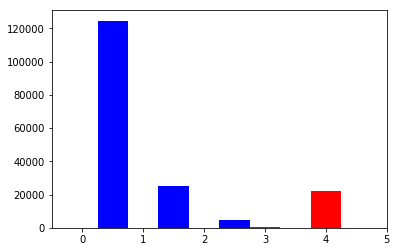

In [10]:
# choose the number of games Dagobert is supposed to play
games = 100
# keep record of the coins (~reward) Dagobert gets on every move in each box
coins = np.zeros((5, 2))
# count the moves per box
moves = np.zeros((5, 2))
for i in range(games):
    s = env.reset()
    done = False
    while not done:
        if np.sum(coins[s, :]) == 0:
            a = np.random.randint(0, 2)
        else:
            a = np.argmax(coins[s, :])
        new_s, r, done, _ = env.step(a)
        coins[s, a] += r
        moves[s, a] += 1
        s = new_s
        # uncomment in case you want to visualize it dynamically!
        #clear_output(wait=True)
        #plot_bar(coins[:,0],coins[:,1])
        #time.sleep(0.001)
print("table of coins collected on each move: \n", coins)
print("coins per move: \n", np.sum(coins)/(games*1000))
np.set_printoptions(suppress=True)
print("# of times the move was chosen: \n", moves)
np.set_printoptions(suppress=False)
plot_bar(coins[:,0],coins[:,1])

In order to compare the final states of the previous model and all future models and for ease of use, we move the models into functions and create the play_game() function, to run the game exactly once with the final table of the respective model as input.

In [11]:
# function of the "stupid model", i.e. Dagobert records every individual reward per move.
def stupid_model(games = 200, display_prints=True):
    # list of average coins per step per game
    coins_avg = []
    # same as coin, but gets reset after each game for monitoring purposes
    coins_monitor = np.zeros((5, 2))
    coins = np.zeros((5, 2))
    moves = np.zeros((5, 2))
    for i in range(games):
        s = env.reset()
        done = False
        while not done:
            if np.sum(coins[s, :]) == 0:
                a = np.random.randint(0, 2)
            else:
                a = np.argmax(coins[s, :])
            new_s, r, done, _ = env.step(a)
            coins[s, a] += r
            coins_monitor[s, a] += r
            moves[s, a] += 1
            s = new_s
        # append sum of game to coins_avg
        coins_avg.append(np.sum(coins_monitor)/1000)
        # reset coins_monitor
        coins_monitor = np.zeros((5, 2))
    if display_prints == True:
        plot_bar(coins[:,0],coins[:,1])
        # plot graph of average coins per move per game
        plt.plot(coins_avg)
        plt.show()
        print("total average coins per move: ", np.sum(coins)/(games*1000))
    return coins

In [12]:
# function 
def play_game(coins, display_prints=True):
    s = env.reset()
    coins_sum = 0
    done = False
    while not done:
        # choose the move based on the final table
        a = np.argmax(coins[s, :])
        # get results from the move
        s, r, done, _ = env.step(a)
        coins_sum += r
    if display_prints==True:
        print("play_game sum of coins: ", coins_sum)
    return coins_sum

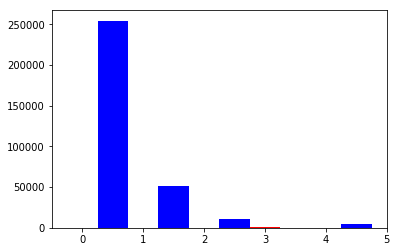

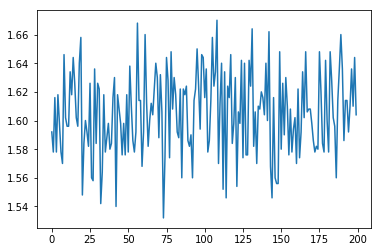

total average coins per move:  1.60504
play_game sum of coins:  1616


1616

In [13]:
play_game(stupid_model())

As a simple comparison, if Dagobert was smart enough to ALWAYS make move 1 in EVERY step of the game, he will end up with ~ 1.6 coins per move, as the randomness factor in the gym game is roughly 20%:

In [14]:
# function to run the game with ALWAYS running the same move, 1 or 0.
def simple_model(games = 200, move = 1, display_prints=True):
    # list of average coins per step per game
    coins_avg = []
    # same as coin, but gets reset after each game for monitoring purposes
    coins_monitor = np.zeros((5, 2))
    coins = np.zeros((5, 2))
    moves = np.zeros((5, 2))
    for i in range(games):
        s = env.reset()
        done = False
        while not done:
            a = move
            new_s, r, done, _ = env.step(a)
            coins[s, a] += r
            coins_monitor[s, a] += r
            moves[s, a] += 1
            s = new_s
        coins_avg.append(np.sum(coins_monitor)/1000)
        coins_monitor = np.zeros((5, 2))
    if display_prints == True:
        plot_bar(coins[:,0],coins[:,1])
        plt.plot(coins_avg)
        plt.show()
        print("total average coins per move: ", np.sum(coins)/(games*1000))
    return coins

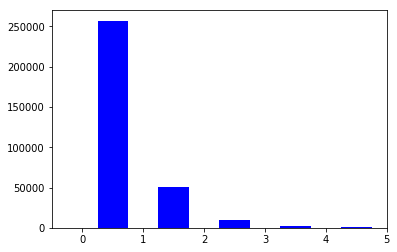

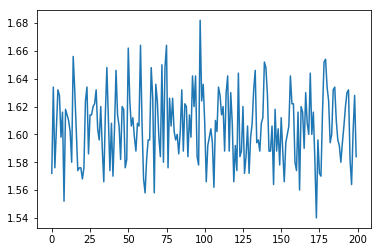

total average coins per move:  1.6058
play_game sum of coins:  1600


1600

In [15]:
play_game(simple_model())

Nonetheless, one shall not be ignorant and discredit Dagobert as an idiot. After all, he got into this game not knowing any rules whatsoever. He's just trying to find his way by try and error and a bit of unsophisticated algorithmic.

So it is clear that at this point, Dagobert has some sort of idea on how to play the game but since he's only recording the quick wins of the game, he overlooks the bigger picture. His table will not tell him, that it might be worth not getting any coins for 4 consecutive moves to then get 10 coins for every single move, i.e. move from Box 0 to 4 and then keep repeating move 0. Furthermore, due to the simplicity of the model, Dagobert is locked in as soon as he gains any coins at all.

So we need a smarter way to do this.

### Giving Dagobert the Power of Q-Learning

Q-Learning is a reinforcement learning technique that's based on developing policies that guide the agent based on the circumstances of any given game.

It basically means that Dagobert is no longer just regarding the immediate rewards. With Q-Learning, he will be able to make decisions based on the **overall quality** of a decision on the **entire** game. In order for Q-Learning to work, the game needs to satisfy the Markov Property, which basically says that any state at time t+1 only depends on the state and the action of time t. In other words, if Dagobert makes a move 0 from Box 2, then the result should not in any way depend on Dagoberts previous decisions. Luckily, that is the case in our game.

Now what we are trying to do is to propagate future results to earlier actions. So optimally, Dagobert already knows in box 0 that he can expect a reward of 10 if he reaches box 4 and makes move 0. We can do that by applying the bellman equation. Mathematically speaking, it looks like this:

Stupid model:
coins[3, 0] = 0   VS   coins[3, 1] >= 2. 
Better model:
We assign to this state the reward Dagobert *would* receive if he chose action 0 in state 4: 
coins[3, 0] = r + 10 = 10 – a 

The more general Q learning rule: Q(s,a)=Q(s,a)+α(r+γmaxa′Q(s′,a′)–Q(s,a))

The idea of propagating possible reward from the best possible actions in future states is a core component of what is called **Q learning**. In Q learning, the Q value for each action in each state is updated when the relevant information is made available. Dagobert is looking forward to determine the best possible future rewards before making the next step a.

So we are going to look at our records every step along the way and calculate the quality of the current step based on the data we have regarding the future steps. In theory, this should allow us to have a relationship among each box and the respective move, being able to make the optimal decision based on the **overall quality** of the move, not just the immediate reward. 

γ < 1 accounts for the randomness in the game and is responsible to make the results in the far future seem less important. The whole sum is multiplied by a learning rate α which is important for optimal convergence just like in the other machine learning methods.

Time to build: 

In [16]:
# function to calculate with Q table: learning rate is allowing us to control the speed of learning
#  and discount in order to penalize future results for randomness
def better_model(games = 200, learn_rate = 0.8, discount = 0.95, display_prints=True):
    coins_avg = []
    coins_monitor = np.zeros((5, 2))
    coins = np.zeros((5, 2))
    moves = np.zeros((5, 2))
    # table of quality scores for the bellman equation
    quality = np.zeros((5, 2))
    for i in range(games):
        s = env.reset()
        done = False
        while not done:
            if np.sum(quality[s, :]) == 0:
                a = np.random.randint(0, 2)
            else:
                a = np.argmax(quality[s, :])
            new_s, r, done, _ = env.step(a)
            coins[s, a] += r
            coins_monitor[s, a] += r
            moves[s, a] += 1
            s = new_s
            new_s, r, done, _ = env.step(a)
            quality[s, a] += r + learn_rate*(discount*np.max(quality[new_s, :]) - quality[s, a])
            # uncomment in case you want to visualize it graphically!
            #clear_output(wait=True)
            #plot_bar(quality[:,0],quality[:,1])
            #time.sleep(0.001)
        coins_avg.append(np.sum(coins_monitor)/1000)
        coins_monitor = np.zeros((5, 2))
    if display_prints == True:
        plot_bar(coins[:,0],coins[:,1])
        plt.plot(coins_avg)
        plt.show()
        print("total average coins per move: ", np.sum(coins)/(games*1000))
    return coins

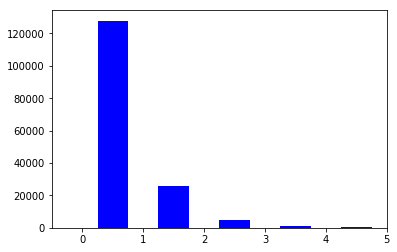

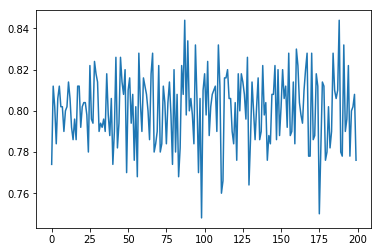

total average coins per move:  0.80088
play_game sum of coins:  1624


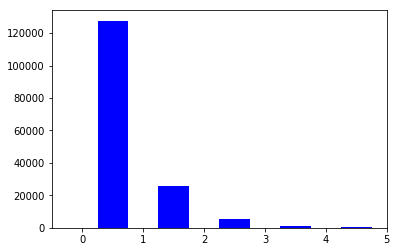

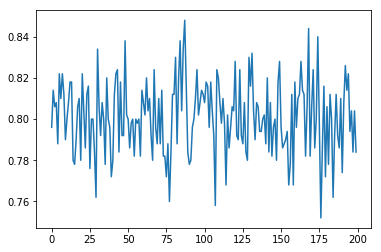

total average coins per move:  0.80093
play_game sum of coins:  1604


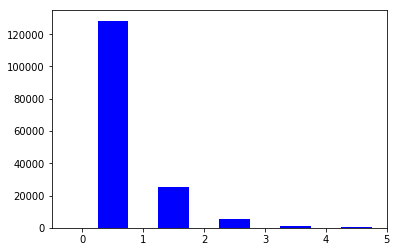

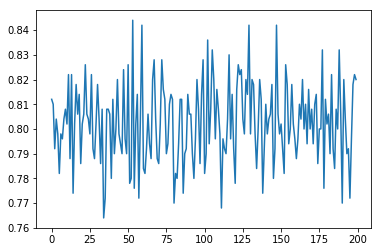

total average coins per move:  0.80258
play_game sum of coins:  1570


1570

In [17]:
play_game(better_model())
play_game(better_model())
play_game(better_model())

As we can see, if we were to move forward with the bellman equation alone, we will be locked in very quickly due to the randomness in the game. Remember, we're always picking the future move with the largest quality. Thus, especially in case of the gym game, Dagobert will still tend to prefer move 1 as it's likely to be rewarded early and consequently receives a high quality score early in the game. In order to not depend so much on being lucky, we need a way to make our model more consistent.

### Hello, ϵ -greedy Q learning!

The only way to prevent the state of being locked in is by introducing randomness. So in a way, we're fighting randomness with randomness. This forces our algorithm to explore new possibilities. Mathematically speaking, this is called doing an ϵ -greedy action selection, but that sounds way more complicated then it is, so we'll call it "Dagobert flips a coin". Essentially what we're doing now is to let Dagobert **flip a coin on EVERY SINGLE MOVE**. If the coin shows heads, he will make his next move based on the quality score in our quality table. If it shows tails, we will pick a random move. This will force Dagobert to pick half of his moves in the first game based on chance. But since we are assuming that our Q table will indeed get smarter over time, we will reduce the amount of random picks over time by multiplying our likelihood score for picking at random (eps) by a decay value. So eventually, more and more decisions will be based on our knowledge rather than just a coin flip.

More professionally speaking:
The greed value ϵ (which may be set to decay over time): if a random number is selected which is **less than this value, an action is chosen completely at random**. This step allows some random exploration of the value of various actions in various states, and can be scaled back over time to allow the algorithm to concentrate more on exploiting the best strategies that it has found.

In [18]:
# function to determine the Q table with quality scores for all respective boxes and moves,  
# with eps to establish random exploration.
def best_model(games = 200, learn_rate = 0.8, discount = 0.95, eps = 0.5, decay = 0.99, display_prints=True):
    coins_avg = []
    coins_monitor = np.zeros((5, 2))
    coins = np.zeros((5, 2))
    moves = np.zeros((5, 2))
    quality = np.zeros((5, 2))
    for i in range(games):
        s = env.reset()
        done = False
        while not done:
            if np.random.random() < eps or np.sum(quality[s, :]) == 0:
                a = np.random.randint(0, 2)
            else:
                a = np.argmax(quality[s, :])
            new_s, r, done, _ = env.step(a)
            coins[s, a] += r
            coins_monitor[s, a] += r
            moves[s, a] += 1
            s = new_s
            new_s, r, done, _ = env.step(a)
            quality[s, a] += r + learn_rate*(discount*np.max(quality[new_s, :]) - quality[s, a])
            # uncomment in case you want to visualize it graphically!
            #clear_output(wait=True)
            #plot_bar(quality[:,0],quality[:,1])
            #time.sleep(0.001)
        coins_avg.append(np.sum(coins_monitor)/1000)
        coins_monitor = np.zeros((5, 2))
        # reduce eps by factor of decay to decrease randomness as the table gets "smarter"
        eps = eps * decay
    if display_prints==True:
        plot_bar(coins[:,0],coins[:,1])
        plt.plot(coins_avg)
        plt.show()
        print("total average coins per move: ", np.sum(coins)/(games*1000))
    return coins

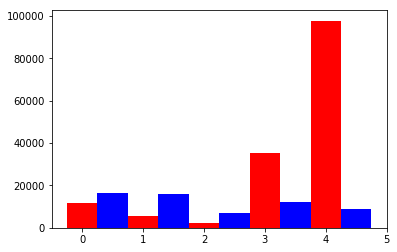

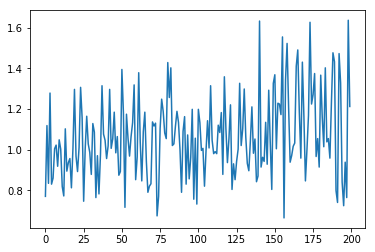

total average coins per move:  1.06383
play_game sum of coins:  1770


1770

In [19]:
play_game(best_model())

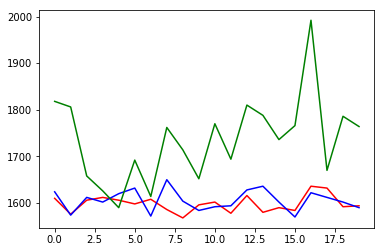

In [20]:
# compare results of the three models
# initialize results array
results = np.zeros((20, 3))
# retrieve final Q/Coin tables after runnung for 400 times
stupid_table = stupid_model(display_prints=False, games= 400)
better_table = better_model(display_prints=False, games= 400)
best_table = best_model(display_prints=False, games= 400)
# applying the final tables to one game for 20 times
for i in range(20):
    results[i,0] = play_game(stupid_table, display_prints=False)
    results[i,1] = play_game(better_table, display_prints=False)
    results[i,2] = play_game(best_table, display_prints=False)
# display the results
# stupid: r
# better: b
# best: g
i = 0
for color in ['r', 'b', 'g']:
    plt.plot(results[:,i], color=color)
    i += 1
plt.show()

### Luckily, Keras can do both and more!

Having done all of the previous calculations above in numpy is an absolutely valid option. However, one needs to consider that other potential games Dagobert wants to learn require more states and more actions. In those cases, it is more suitable to use a neural network. 

Let's build a neural network for Dagobert's gym game.

Our model is going to look like this:
![title](img/NeuralN.png)

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, InputLayer

Using TensorFlow backend.


In [26]:
model = Sequential() # create model using the Keras Sequential API
model.add(InputLayer(batch_input_shape=(1, 5))) # add input layer
model.add(Dense(15, activation='sigmoid')) # sigmoid activated hidden layer with 10 nodes
model.add(Dense(2, activation='linear')) # linear activated output layer which will yield the Q values for each action
model.compile(loss='mse', optimizer='adam', metrics=['mae']) # compile model using a mean-squared error loss function with Adam optimizer 

In [27]:
## Legend: former code ##

# execute the q learning method with tensorflow
def neural_method(games = 200, learn_rate = 0.85, discount = 0.95, eps = 0.5, decay = 0.99, display_prints=True):
    coins_avg = []
    coins_monitor = np.zeros((5, 2))

    coins = np.zeros((5, 2)) ##
    moves = np.zeros((5, 2)) ##

    for i in range(games): ##
        s = env.reset() ##

        eps *= decay

        #if i % 1 == 0 and display_prints==True:
            #print("Episode {} of {}".format(i + 1, games))

        done = False ##

        r_sum = 0 

        while not done: ##
            ## a = 1 ##
            if np.random.random() < eps:
                a = np.random.randint(0, 2)
            else:
                # predict the "quality" for both actions (e.g. moves) of the next state, then choose the move with higher quality
                a = np.argmax(model.predict(np.identity(5)[s:s + 1]))

            new_s, r, done, _ = env.step(a) ##

            coins[s, a] += r ##
            moves[s, a] += 1 ##
            coins_monitor[s, a] += r
            
            # target represents the prediction of the Q value for the next state
            target = r + discount * np.max(model.predict(np.identity(5)[new_s:new_s + 1]))

            # target_vec represents the Q value for the current state of BOTH actions
            target_vec = model.predict(np.identity(5)[s:s + 1])[0]

            # we just induce the target value of the action we have taken
            target_vec[a] = target
            # updating the model: 1 arg is the current state (e. g. input), 2 arg is target vector with the updated reward
            model.fit(np.identity(5)[s:s + 1], target_vec.reshape(-1, 2), epochs=1, verbose=0)        


            s = new_s ##

            r_sum += r
            
                    
        coins_avg.append(np.sum(coins_monitor)/1000)
        coins_monitor = np.zeros((5, 2))
        # uncomment in case you want to visualize it graphically! ##
        clear_output(wait=True) ##
        plot_bar(coins[:,0],coins[:,1])
        plt.plot(coins_avg)
        plt.show()
        #time.sleep(0.001) ##

    if display_prints == True:
        plot_bar(coins[:,0],coins[:,1])
        plt.plot(coins_avg)
        plt.show()
        print("total average coins per move: ", np.sum(coins)/(games*1000))
    return (coins, moves)

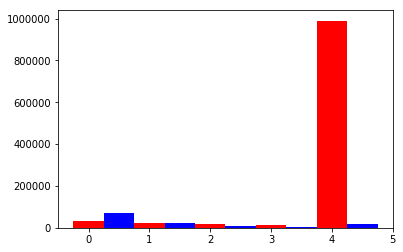

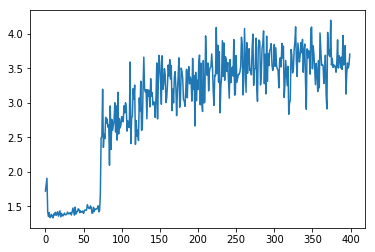

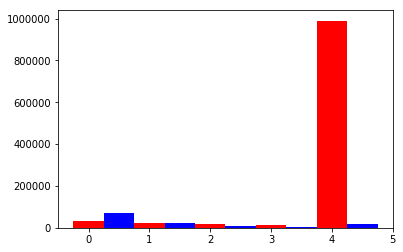

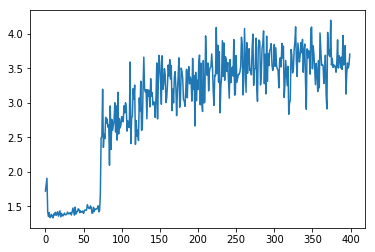

total average coins per move:  2.99147


(array([[ 32090.,  69998.],
        [ 22460.,  23324.],
        [ 17370.,   8554.],
        [ 13136.,   4008.],
        [989548.,  16100.]]), array([[ 78792.,  43764.],
        [ 56875.,  14559.],
        [ 43156.,   5343.],
        [ 33028.,   2479.],
        [117454.,   4550.]]))

In [28]:
neural_method(games=400)